float64


['Yb',
 'Ag',
 'Cu',
 'La',
 'Ce',
 'Ta',
 'Sr',
 'Ca',
 'Mn',
 'Sm',
 'Li',
 'Sn',
 'K',
 'Y',
 'Na',
 'Ba',
 'Sb',
 'H',
 'Zn',
 'Co',
 'Ni',
 'Ga',
 'Bi',
 'In',
 'Cr']

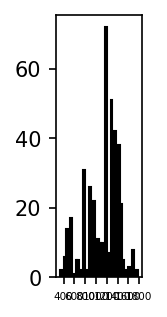

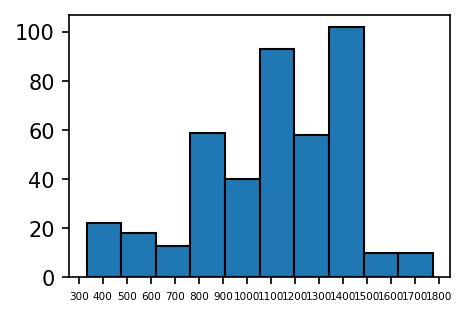

In [92]:
%matplotlib inline
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
from pylab import *
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import MultipleLocator
from sklearn import linear_model

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.kernel_ridge import KernelRidge
from sklearn.naive_bayes import GaussianNB
from collections import OrderedDict
from sklearn import mixture
from sklearn import cluster, preprocessing, mixture 
#　データセット読み込み
df = pd.read_csv('Perovskite_Water_Splitting_Dup.csv')
df = df.rename(columns={'B1_mole': 'B1 mole'})
#　列の取り出しかつ、nanを0に置き換え
#df['CalcT'] = df['CalcT'].fillna(value = 0)

#　列の取り出しかつ、nanを削除
#df['CalcT'] = df['CalcT'].dropna()
print(df['CalcT'].dtype)

# nanを置き換えた0を除く*重複した行は全部消える。sortは行番号と値を表示してくれる。
#df[df['CalcT'] > 0]['CalcT'].drop_duplicates().sort_values(ascending = False)

#df[df['CalcT'] > 0]['CalcT'].drop_duplicates().sort_values(ascending = False)

#figureとaxesを作ってヒストグラムを作成
fig, ax = subplots(1, 1, figsize = (1, 2), dpi = 150, constrained_layout = True)
ax.hist(df['CalcT'],bins = 40, edgecolor = 'black')

#x軸の目盛りのサイズを指定
ax.tick_params(axis = "x", labelsize = 5)
#目盛りの幅を指定
ax.xaxis.set_major_locator(MultipleLocator(200))

#df_1 = df_1.astype(str)
#fig1 = plt.figure(tight_layout = True)
#ax = fig1.subplots()
#ax = plt.hist(df_1)
#ax.tick_params(axis = "x", fontsize = 8)

fig, ax = subplots(1, 1, figsize = (3, 2), dpi = 150, constrained_layout = True)
ax.hist(df[df['CalcT'] > 0]['CalcT'], edgecolor = 'black')
ax.tick_params(axis = "x", labelsize = 5)
ax.xaxis.set_major_locator(MultipleLocator(100))

#his = plt.hist(df_1,bins = 5)
#plt.tick_params(width = 2, length = 10)
#his.set_xlabel("x", size = 14, weight = "light")

li = list(set(list(df['A'].dropna()) + list(df['A1'].dropna()) + list(df['A2'].dropna())))
li

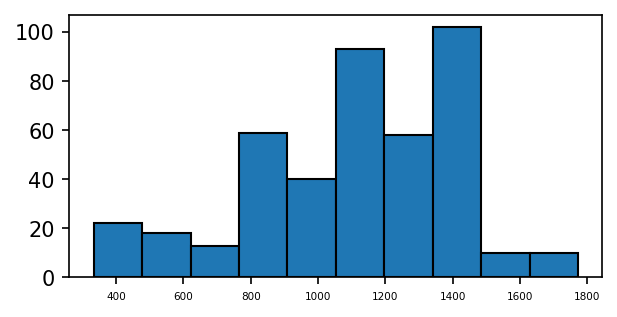

In [3]:
#df[df['CalcT'] > 0]['CalcT'].drop_duplicates().sort_values(ascending = False)
df[df['CalcT'] > 0]['CalcT'].sort_values(ascending = False)
fig, ax = subplots(1, 1, figsize = (4, 2), dpi = 150, constrained_layout = True)
ax.hist(df[df['CalcT'] > 0]['CalcT'], edgecolor = 'black')
ax.tick_params(axis = "x", labelsize = 5)

In [25]:
df['CalcT'].drop_duplicates().sort_values()

8         0.0
156     333.0
493     413.0
486     453.0
499     473.0
356     543.0
437     603.0
180     623.0
240     643.0
214     673.0
129     723.0
6       743.0
380     770.0
21      773.0
131     823.0
98      873.0
133     923.0
99      973.0
135    1023.0
100    1073.0
386    1123.0
382    1150.0
2      1173.0
233    1223.0
1      1273.0
381    1350.0
0      1373.0
312    1400.0
225    1420.0
30     1423.0
373    1470.0
164    1473.0
313    1498.0
34     1573.0
318    1623.0
329    1673.0
36     1773.0
Name: CalcT, dtype: float64

34
['Na', 'Sr', 'K', 'Bi', 'Zn', 'La', 'Ca', 'Ba', 'Sb', 'Li', 'Y', 'Cu', 'In', 'Ag', 'Co', 'Mn', 'Ga', 'Sm', 'Ni', 'Cr'] [134, 106, 51, 50, 44, 41, 29, 23, 13, 11, 11, 7, 6, 4, 3, 2, 2, 1, 1, 1]


<BarContainer object of 20 artists>

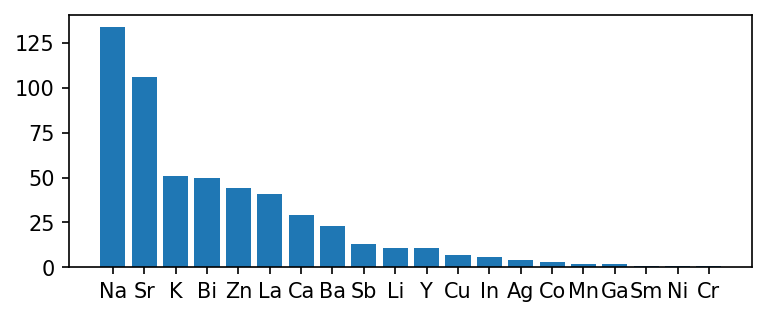

In [75]:
#print(df.iloc[1:25,:])
col_lis = df.columns.tolist()
print(len(col_lis))
#for i in col_lis:
#    print(i)
#print(df['A'].value_counts())
#fig, ax = subplots(1, 1, figsize = (5, 2), dpi = 150, constrained_layout = True)
dtype(df['A'].value_counts())
lis = list(df['A'].value_counts())
df['A'].value_counts()
lis1 = []
lis2 = []
for index, value in df['A'].value_counts().iteritems():
    lis1.append(index)
    lis2.append(value)
print(lis1,lis2)
lis3 = list(range(len(lis1)))
fig, ax = subplots(1, 1, figsize = (5, 2), dpi = 150, constrained_layout = True)
ax.bar(lis3, lis2, tick_label=lis1, align="center")

In [74]:
for i in ["A", "A1", "A2", "B", "B1", "B2"]:
    print(df[i].dropna().shape[0])
    #print(df[i].value_counts())
    #df["A1"].dropna()

540
167
23
540
148
7


['Ref', 'A', 'A1', 'A2', 'B', 'B1', 'B2', 'X', 'X1', 'A mole', 'A1 mole', 'A2 mole', 'B mole', 'B1_mole', 'B2 mole', 'X mole', 'X1 mole', 'Prep Meth', 'CalcT', 'Calc', 'Prom Meth', 'Promoter', 'Prom', 'Crystal', 'BandGap', 'Surface Area', 'CatW', 'Alcohol%', 'Sac. Agent1', 'Sac. Agent2', 'Light', 'Power', 'Wave', 'ProdRate']


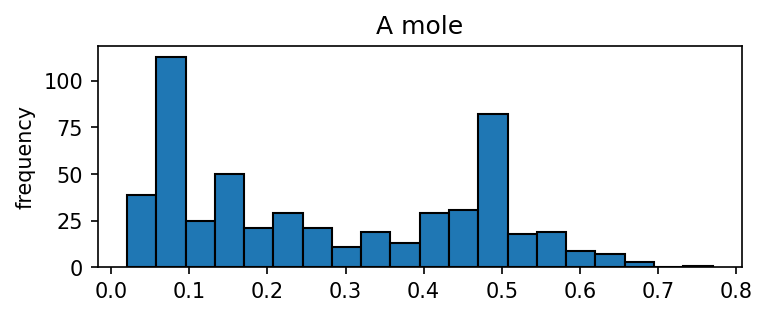

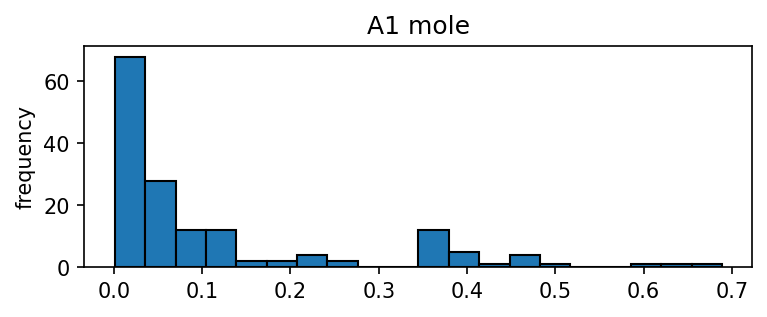

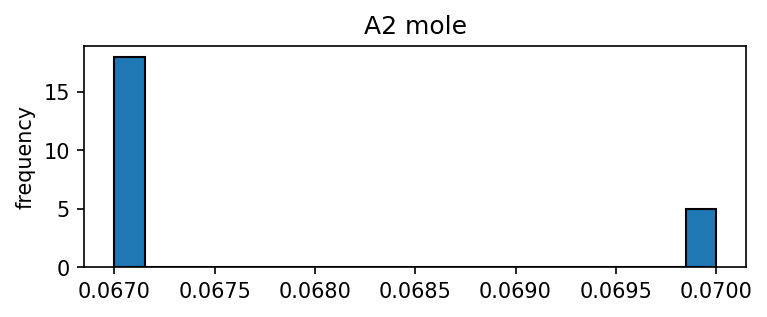

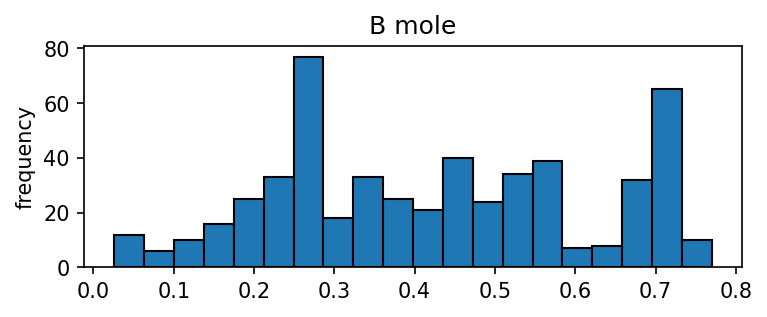

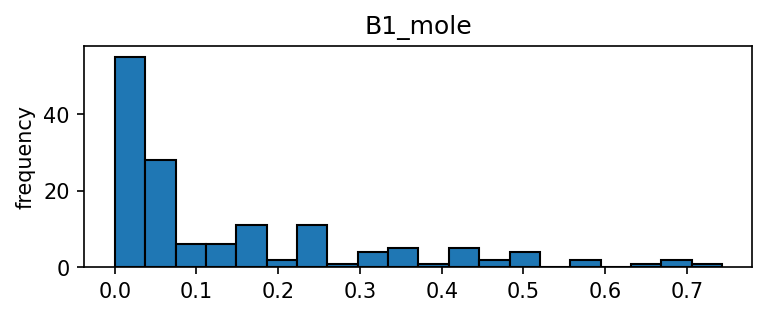

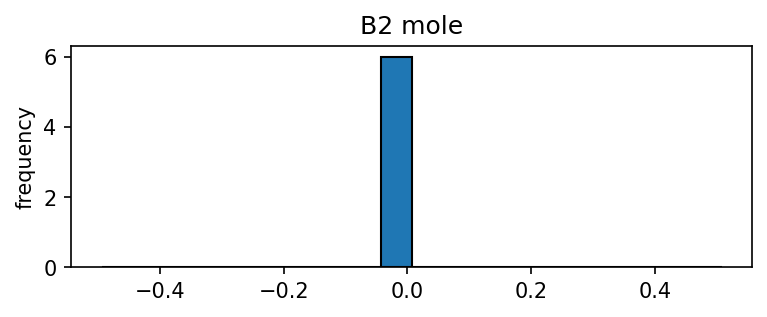

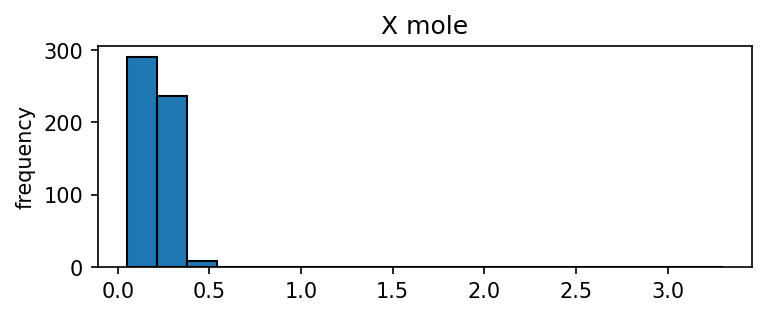

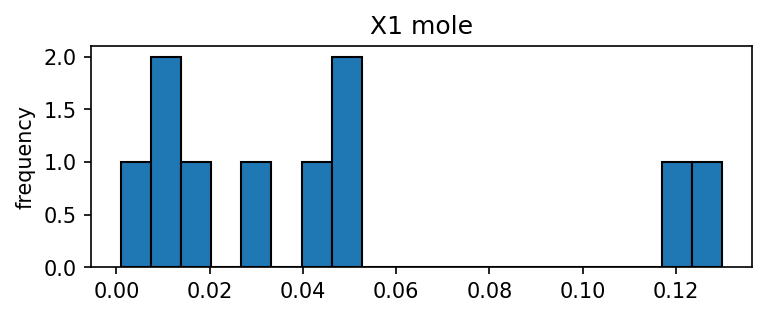

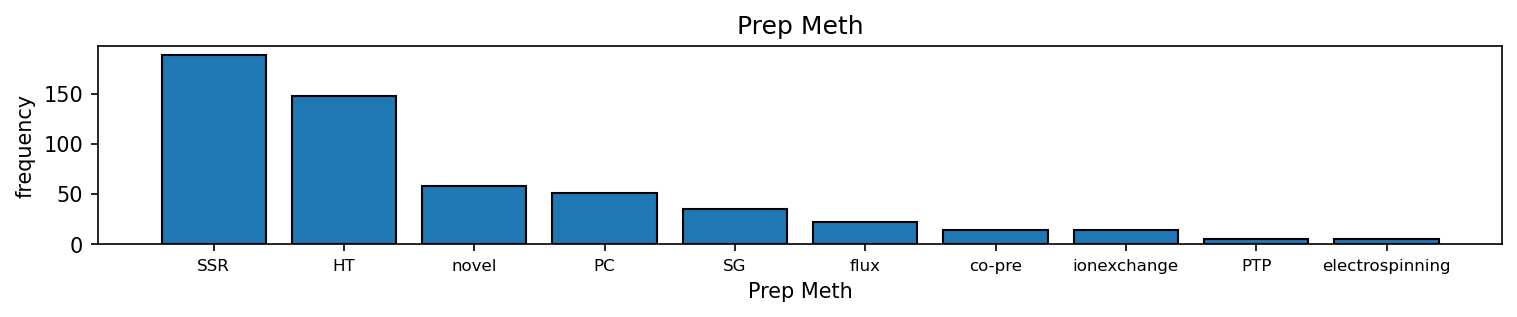

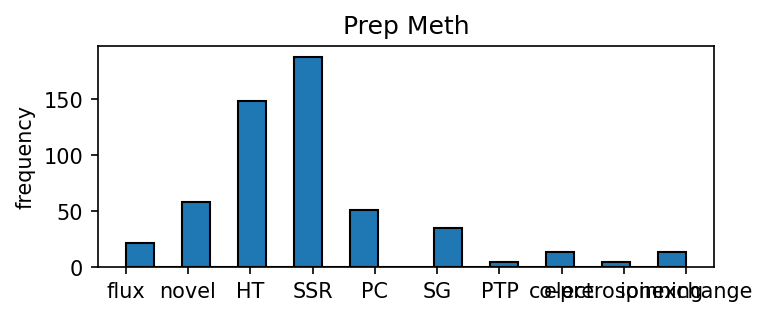

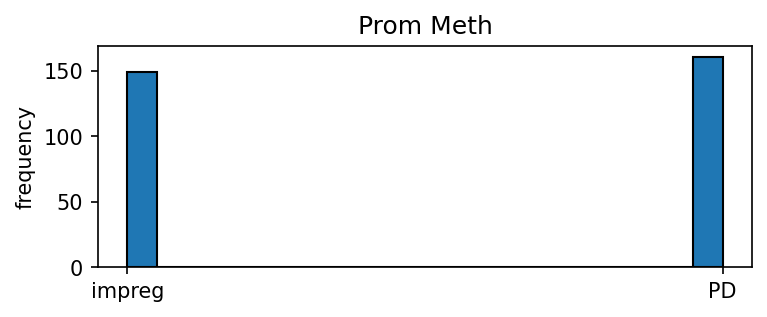

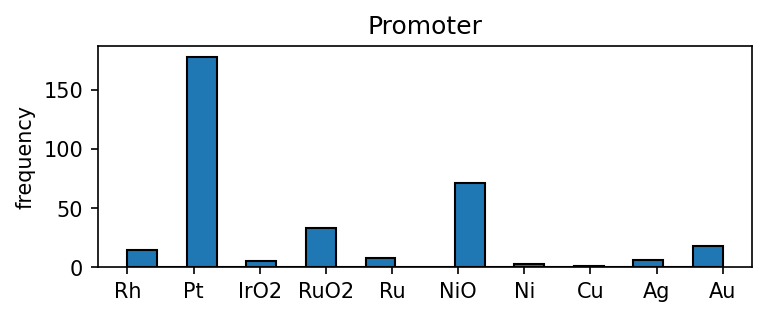

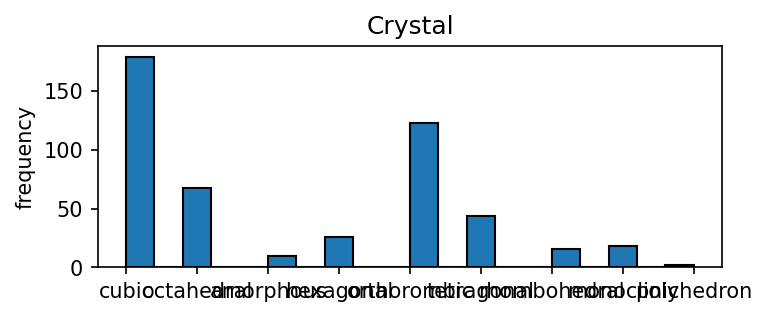

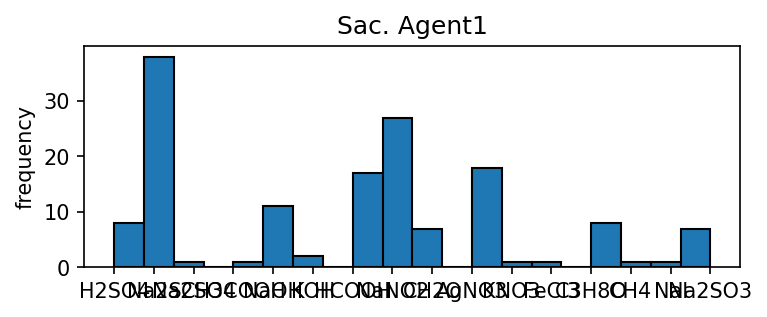

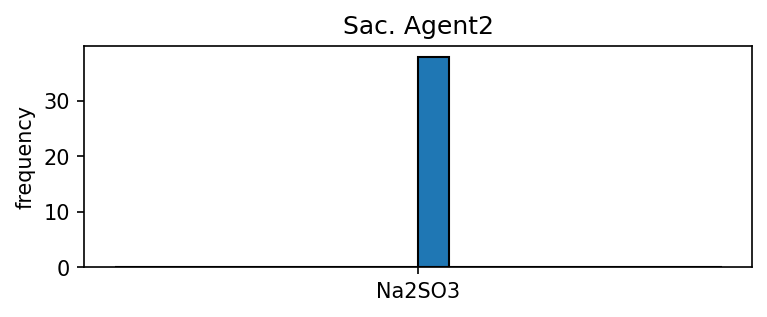

In [4]:
def analysis_plot(df, column_name, plot_type,):
    if plot_type == bar:
        lis1 = []
        lis2 = []
        for index, value in df[column_name].dropna().value_counts().iteritems():
            lis1.append(index)
            lis2.append(value)
        lis3 = list(range(len(lis1)))
        fig, ax = subplots(1, 1, figsize = (len(lis3), 2), dpi = 150, constrained_layout = True)
        ax.bar(lis3, lis2, tick_label=lis1, align="center",edgecolor = 'black')
        #x軸の目盛りのサイズを指定
        ax.tick_params(axis = "x", labelsize = 8)
        #軸のラベル及び、タイトル設定
        ax.set(xlabel = column_name, ylabel = 'frequency',title = column_name)
    
    if plot_type == hist:
        fig, ax = subplots(1, 1, figsize = (5, 2), dpi = 150, constrained_layout = True)
        df[column_name].describe()
        bins = len(set(df[column_name].dropna()))
        ax.hist(df[column_name].dropna(), bins = 20, edgecolor = 'black')
        ax.set( ylabel = 'frequency',title = i )
        
        
        
lis1 = ["A", "A1", "A2", "B", "B1", "B2","X","X1"]
lis2 = ["A mole","A1 mole","A2 mole","B mole","B1_mole","B2 mole","X mole","X1 mole"]
lis3 = ['Prep Meth','Prom Meth','Promoter','Crystal', 'Sac. Agent1', 'Sac. Agent2']
###########各サイトの原子のデータ数######
#lis1 = ["A", "A1", "A2", "B", "B1", "B2","X","X1"]

#for i in lis1:
    #analysis_plot(df, i, bar)
    
    
###########各サイトのの質量%のデータ数###########
lis2 = ["A mole","A1 mole","A2 mole","B mole","B1_mole","B2 mole","X mole","X1 mole"]
for i in lis2:
    analysis_plot(df, i, hist)
    
    
###########準備方法と焼成温度及び時間#
analysis_plot(df,'Prep Meth', bar)
lst3 = ['CalcT', 'Calc']
for i in lis3:
    analysis_plot(df, i, hist)


    
print(list(df.columns))

(array([45., 36., 15.,  7., 10.,  7.,  2.,  2.,  0.,  3.,  1.,  2.,  0.,
         0.,  0., 12.,  0.,  5.,  1.,  1.,  3.,  0.,  1.,  0.,  0.,  0.,
         1.,  1.,  0.,  1.]),
 array([0.001     , 0.02393333, 0.04686667, 0.0698    , 0.09273333,
        0.11566667, 0.1386    , 0.16153333, 0.18446667, 0.2074    ,
        0.23033333, 0.25326667, 0.2762    , 0.29913333, 0.32206667,
        0.345     , 0.36793333, 0.39086667, 0.4138    , 0.43673333,
        0.45966667, 0.4826    , 0.50553333, 0.52846667, 0.5514    ,
        0.57433333, 0.59726667, 0.6202    , 0.64313333, 0.66606667,
        0.689     ]),
 <BarContainer object of 30 artists>)

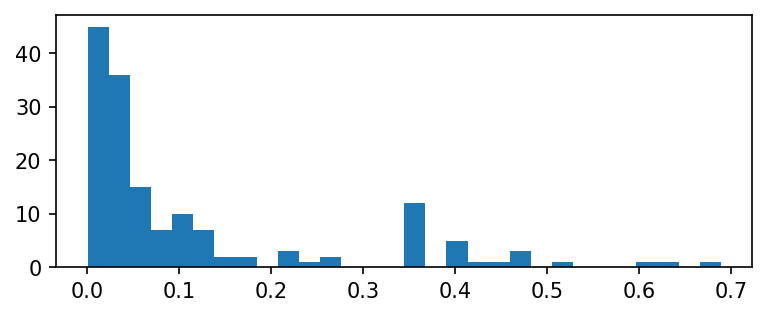

In [105]:
fig, ax = subplots(1, 1, figsize = (5, 2), dpi = 150, constrained_layout = True)
df['A mole'].describe()
bins = len(set(df['A mole'].dropna()))
ax.hist(df['A1 mole'].dropna(),bins = 30)

(array([ 2., 10.,  0.,  0.,  2.,  2.,  2.,  4.,  2.,  2.,  1., 11.,  1.,
         1.,  3.,  0., 61.,  0.,  0.,  2.]),
 array([0.048  , 0.07355, 0.0991 , 0.12465, 0.1502 , 0.17575, 0.2013 ,
        0.22685, 0.2524 , 0.27795, 0.3035 , 0.32905, 0.3546 , 0.38015,
        0.4057 , 0.43125, 0.4568 , 0.48235, 0.5079 , 0.53345, 0.559  ]),
 <BarContainer object of 20 artists>)

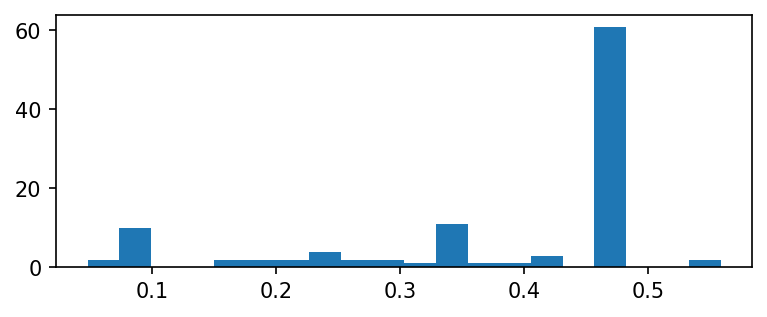

In [19]:
#set1 = set(list(df["A"]))
#set2 = list(np.arange(len(set1)))
#pd.DataFrame({"met" : list(set1)})
df[df["A"] == "Sr"]["A mole"]
fig, ax = subplots(1, 1, figsize = (5, 2), dpi = 150, constrained_layout = True)
#bins = len(set(df['A mole'].dropna()))
ax.hist(df[df["A"] == "Sr"]["A mole"],bins = 20)
#df1[df1["A"] == "Sr" or df1["A1"] == "Sr" or df1["A2"] == "Sr"]

In [96]:
#####金属ごとの各質量％のデータ量がみたい
#####まず実験・Sr
df
df1 = df[df.loc[:,"A"] == "Sr"].loc[:,"A mole"]
df2 = df[df.loc[:,"A1"] == "Sr"].loc[:,"A1 mole"]
df3 = df[df.loc[:,"A2"] == "Sr"].loc[:,"A2 mole"]
serise_Sr = pd.concat([df1,df2,df3])


######histgramの描画
#fig, ax = subplots(1, 1, figsize = (3, 3), tight_layout = True)
#ax.hist(df_derive['Sr'], bins = 20, edgecolor = 'black')
#ax.set(xlabel = column_name, ylabel = 'frequency', title = 'Sr distribution')


######colimn nemeが金属、wt%がデータのDataFrameがほしい

df1 = df[df.loc[:,"A"] == "Zn"].loc[:,"A mole"]
df2 = df[df.loc[:,"A1"] == "Zn"].loc[:,"A1 mole"]
df3 = df[df.loc[:,"A2"] == "Zn"].loc[:,"A2 mole"]
series_Zn = pd.concat([df1,df2,df3])

df_derive = pd.DataFrame({'Sr': serise_Sr, 'Zn': series_Zn},)
df_derive = pd.concat([lis_Sr,lis_Zn], axis = 1)

######各金属のシリーズを得る

col_dic = {"A":"A mole", "A1":"A1 mole", "A2":"A2 mole"}
col_lis = ["A", "A1", "A2"]
met_lis = list(set(list(df['A'].dropna()) + list(df['A1'].dropna()) + list(df['A2'].dropna())))

def met_series(df, met_name):
    ser1 = df[df.loc[:,"A"] == met_name].loc[:,"A mole"]
    ser2 = df[df.loc[:,"A1"] == met_name].loc[:,"A1 mole"]
    ser3 = df[df.loc[:,"A2"] == met_name].loc[:,"A2 mole"]
    pd_metal = pd.concat([ser1,ser2,ser3])

#ser1 = df[df.loc[:,"A"] == met_name].loc[:,"A mole"]
#ser2 = df[df.loc[:,"A1"] == met_name].loc[:,"A1 mole"]
#ser3 = df[df.loc[:,"A2"] == met_name].loc[:,"A2 mole"]
#metal_dic[met_name] = pd.concat([ser1,ser2,ser3]) 
    
    
#####先に金属名で判別できるリスト(dictionary)を作っとけばいい
def make_DataFrame(df, met_lis, site_list):

    
    ###### metal_dict:{金属名:金属のwt%のシリーズ}のdictionary ←　結局これがほしい
    ###### col_dic   :{サイト名：対応する列}のdictionary
    ###### site_dict :{サイト：指定した金属がサイトに入っているときのwt%のシリーズ}
    ###### series_lis:一時的に3つor２つのseriesを保持するリスト
    
    metal_dic = {}
    col_dic = {"A":"A mole", "A1":"A1 mole", "A2":"A2 mole",
                  "B":"B mole", "B1":"B1 mole", "B2":"A2 mole",
                  "X":"X mole", "X1":"X1 mole",}
    for met_name in met_lis:
        site_dic = {}
        series_lis = []
        for site in site_list:
            site_dic[site] = df[df.loc[:,site] == met_name].loc[:,col_dic[site]]
            series_lis.append(site_dic[site])
        metal_dic[met_name] = pd.concat(series_lis)    
    return metal_dic


['Ref', 'A', 'A1', 'A2', 'B', 'B1', 'B2', 'X', 'X1', 'A mole', 'A1 mole', 'A2 mole', 'B mole', 'B1 mole', 'B2 mole', 'X mole', 'X1 mole', 'Prep Meth', 'CalcT', 'Calc', 'Prom Meth', 'Promoter', 'Prom', 'Crystal', 'BandGap', 'Surface Area', 'CatW', 'Alcohol%', 'Sac. Agent1', 'Sac. Agent2', 'Light', 'Power', 'Wave', 'ProdRate']


/tmp/ipykernel_4093/3225741865.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = subplots(1, 1, figsize = (3, 3), tight_layout = True)


[Text(0.5, 0, 'wt% of Sr'),
 Text(0, 0.5, 'frequency'),
 Text(0.5, 1.0, 'Sr distribution')]

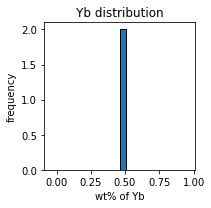

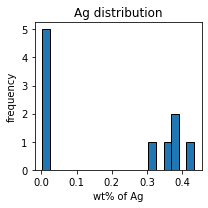

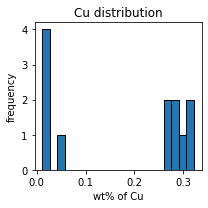

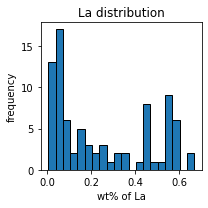

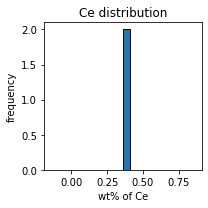

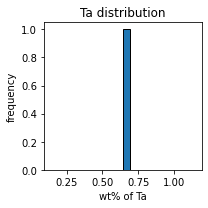

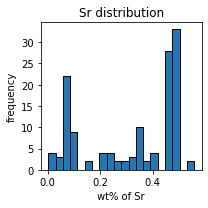

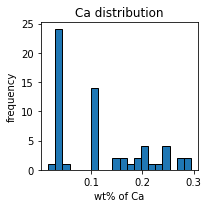

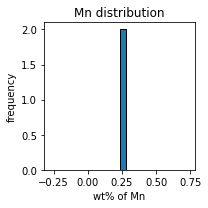

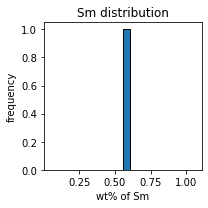

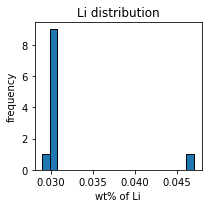

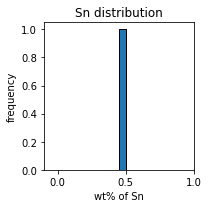

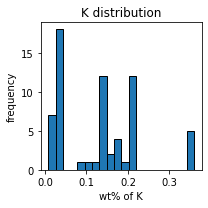

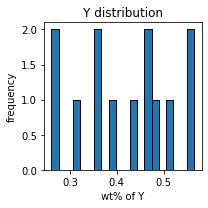

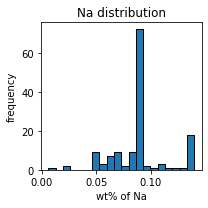

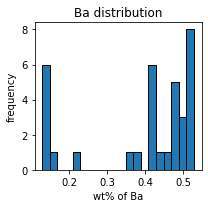

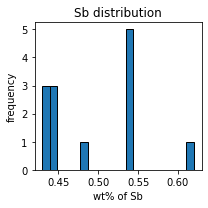

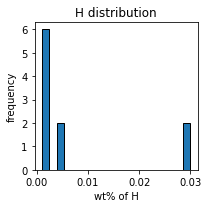

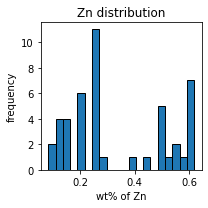

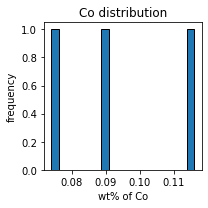

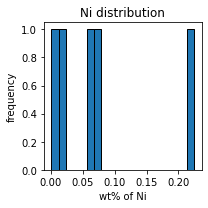

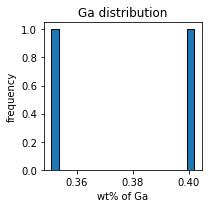

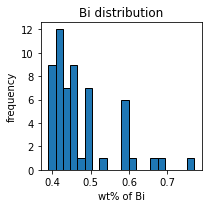

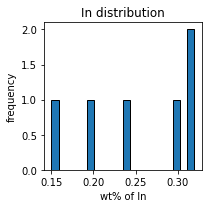

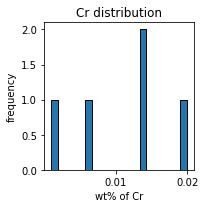

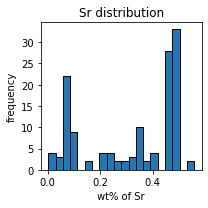

In [104]:
met_lis = list(set(list(df['A'].dropna()) + list(df['A1'].dropna()) + list(df['A2'].dropna())))
dic1 = make_DataFrame(df, met_lis, ["A","A1","A2"])

dic1
fig, ax = subplots(1, 1, figsize = (3, 3), tight_layout = True)
for i in met_lis:
    for a, b in zip
    ax[][].hist(dic1[i], bins = 20, edgecolor = 'black')
    ax[][].set(xlabel = 'wt% of '+i, ylabel = 'frequency', title = i+' distribution')
    
    
#fig, ax = subplots(1, 1, figsize = (3, 3), tight_layout = True)
#ax.hist(dic1['Sr'], bins = 20, edgecolor = 'black')
#ax.set(xlabel = 'wt% of Sr', ylabel = 'frequency', title = 'Sr distribution')
len(lis)